In [2]:
import sys
import sklearn

# 공통 모듈 임포트
import numpy as np
import os
import pandas as pd
import math

np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "KU_ABROAD"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [3]:
# import Data
df = pd.read_excel('/Users/onmywave/Desktop/Github/Datathon/Data_Analysis/Clustering/univ_data.xlsx')

In [4]:
for column in ['s1','s2','s3','s4','s5']:
    df[column] = df[column].fillna(0)



In [5]:
def qs_scoring(df):
    for i in df.index:
        s = sum(df.loc[i,['s1','s2','s3','s4','s5']])
        b = sum(list(map(int,[(df.loc[i,col] != 0 ) for col in ['s1','s2','s3','s4','s5']])))
        print(b)
        if b :
            df.loc[i,'qs_score']  =  s/b
        else :
            df.loc[i,'qs_score'] = 0
            
qs_scoring(df)

df = df[df['qs_score'] != 0]

5
5
5
2
5
5
5
5
5
5
0
5
4
5
5
0
3
5
5
5
0
5
3
5
2
4
5
2
5
4
5
0
1
2
5
5
2
5
0
5
4
5
5
5
5
5
4
2
5
4
0
2
5
5
5
2
5
2
3
4
3
0
5
5
3
0
0
5
3
1
2
0
0
1
5
4
5
0
5
0
1
0
5
4
5
0
0
2
0
5
5
0


In [6]:
from sklearn.cluster import KMeans
k = 5 
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df[['travel_idx','qs_score']])

In [7]:
kmeans.cluster_centers_

array([[53.09153846, 76.19730769],
       [89.96111111, 73.64407407],
       [10.32647059, 69.96313725],
       [63.36357143, 63.58261905],
       [35.52      , 70.38972222]])

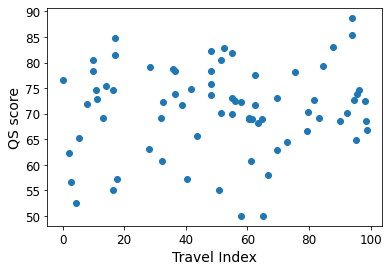

<Figure size 576x288 with 0 Axes>

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
    plt.xlabel("Travel Index", fontsize=14)
    plt.ylabel("QS score", fontsize=14)
    plt.figure(figsize=(8, 4))

plot_clusters(df[['travel_idx','qs_score']])


In [9]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("Travel Index")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("QS Score")
    else:
        plt.tick_params(labelleft=False)

/Users/onmywave/miniforge3/envs/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


그림 저장: voronoi_plot


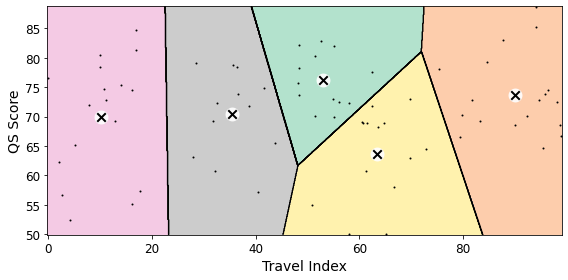

In [10]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, df[['travel_idx','qs_score']])
save_fig("voronoi_plot")
plt.show()

/Users/onmywave/miniforge3/envs/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


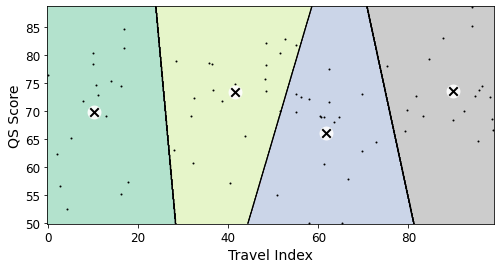

In [11]:
kmeans_k4 =  KMeans(n_clusters=4, random_state=42).fit(df[['travel_idx','qs_score']])

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_k4, df[['travel_idx','qs_score']])
plt.show()

In [12]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

/Users/onmywave/miniforge3/envs/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/onmywave/miniforge3/envs/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


그림 저장: bad_n_clusters_plot


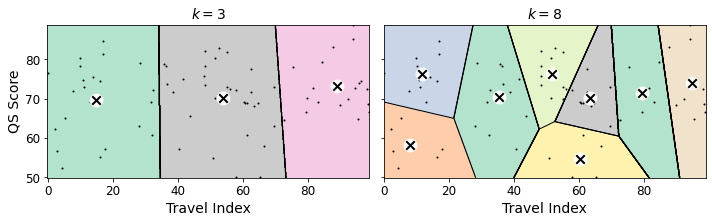

In [13]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, df[['travel_idx','qs_score']], "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [14]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df[['travel_idx','qs_score']]) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[68198.93130589338,
 23587.51055249042,
 11658.62729122807,
 8022.488754496093,
 6419.898179953834,
 5089.1148928771845,
 4247.239018907828,
 3600.6002920334286,
 2987.632015705668]

그림 저장: inertia_vs_k_plot


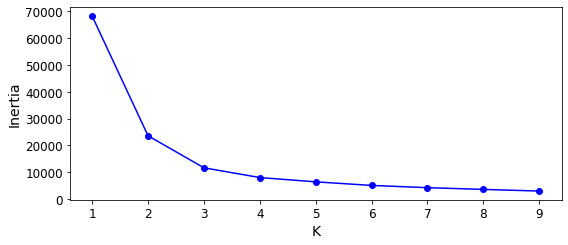

In [15]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("K", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
save_fig("inertia_vs_k_plot")
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(df[['travel_idx','qs_score']], kmeans.labels_)

0.4436727948030306

In [17]:
silhouette_scores = [silhouette_score(df[['travel_idx','qs_score']], model.labels_)
                     for model in kmeans_per_k[1:]]

그림 저장: silhouette_score_vs_k_plot


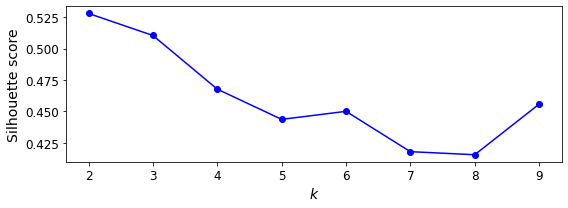

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
save_fig("silhouette_score_vs_k_plot")
plt.show()

그림 저장: silhouette_analysis_plot


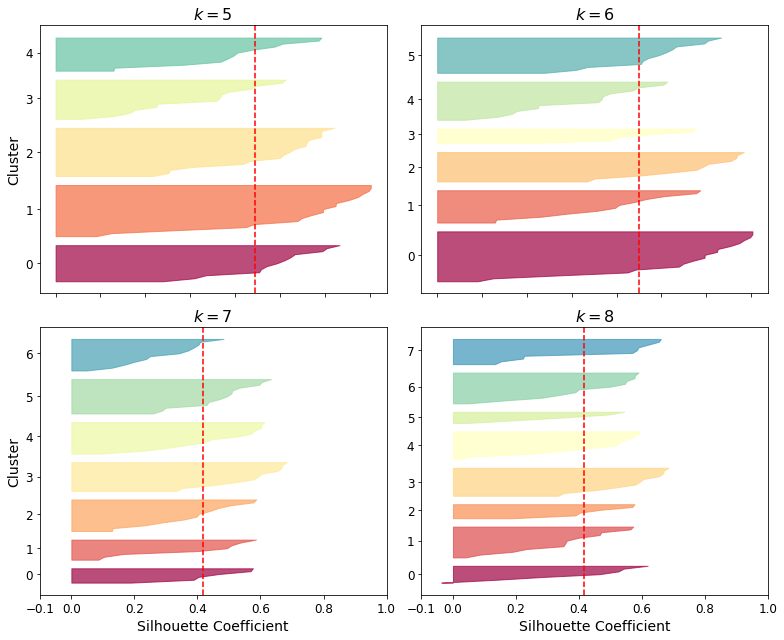

In [21]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (5, 6, 7, 8):
    plt.subplot(2, 2, k - 4)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df[['travel_idx','qs_score']], y_pred)

    padding = len(df[['travel_idx','qs_score']]) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (5, 7):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

/Users/onmywave/miniforge3/envs/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


그림 저장: voronoi_plot_k6


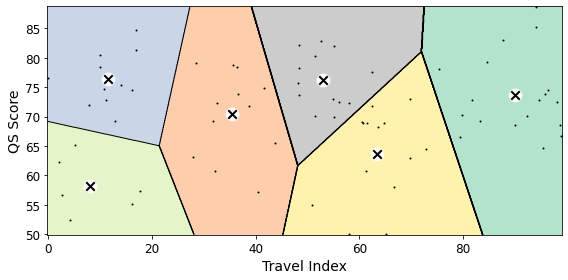

In [25]:
plt.figure(figsize=(8, 4))
kmeans_k6 = KMeans(n_clusters=6, random_state=42).fit(df[['travel_idx','qs_score']])
plot_decision_boundaries(kmeans_k6, df[['travel_idx','qs_score']])
save_fig("voronoi_plot_k6")
plt.show()